In [1]:
import os
import sys
sys.path.insert(0, "../turk/analysis")
from analysis import parse_csv
from collections import defaultdict, OrderedDict 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

def group_by(res_lines, variable_name):
    to_ret = defaultdict(list)
    for line in res_lines:
        interest_key = line[variable_name]
        to_ret[interest_key].append(line)
        
    return to_ret

def sort_by_fxn(res_dict, fxn):
    new_dict = OrderedDict()
#     average = lambda x: sum(x)/len(x)
    to_sort = []
    for key, values in res_dict.items():
        ps = [line['p_true'] for line in values]
        score = fxn(ps)
        to_sort.append((score, key, values))
    to_sort = sorted(to_sort, key = lambda x: x[0])
    
    for __, key, values in to_sort:
        new_dict[key] = values
    return new_dict

res_lines = parse_csv("/Users/Elias/vagueness/results/turk/gqa/pilot_cloudy_results.csv")
figure_path = "/Users/Elias/papers/vagueness-eacl-2020/figures/"

# print(res_lines[0].keys())
# by_sent = group_by(res_lines, "sent")
# add IDs
for i, line in enumerate(res_lines):
    unique_id = f"{line['assignment_id']}-{line['sent']}"
    line["unique_id"] = unique_id
    res_lines[i] = line
    

by_sent = group_by(res_lines, "sent")

by_sent_sorted_avg = sort_by_fxn(by_sent, lambda x: np.mean(x))
by_sent_sorted_std_dev = sort_by_fxn(by_sent, lambda x: np.std(x))

# print(by_ass)
# print(len(by_ass["3HVVDCPGTFX008I22DLYWJIDB3ZYTB-Is the sky cloudy?"]))


<Figure size 432x288 with 0 Axes>

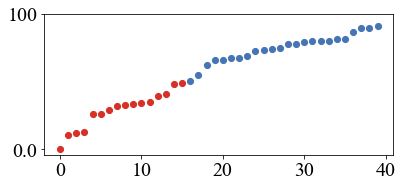

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

import os
from analysis import parse_csv
from collections import defaultdict, OrderedDict 
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt 

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


xs = np.arange(len(by_sent_sorted_avg.keys()))

human_ys = [np.mean([line['p_true']  for line in by_sent_sorted_avg[key] ] ) for key in by_sent_sorted_avg.keys() ]

sents = [line[0]['sent'] for line in by_sent_sorted_avg.values()]

all_lines = [lines[0] for lines in by_sent_sorted_avg.values() ]


true_colors = ["True" if np.mean([line['p_true']  for line in by_sent_sorted_avg[key] ]) > 50 else "False" for key in by_sent_sorted_avg.keys() ]

# model_preds = all_dev_logits['sequence_xlnet-base-cased']
# model_ys = [model_preds[sent][1] for sent in by_sent_sorted_avg.keys()]


# palette = {"True": "#91bfdb" ,
#            "False": "#fc8d59",
#           "tshirt1": ,
#           "tshirt2": ,
#            "journalism": ,
#            "teammate":           }

palette = {"True": '#4575b4' ,
           "False": '#d73027',
          "tshirt1": '#e0f3f8',
          "tshirt2": '#fee090',
           "journalism": '#fc8d59',
           "teammate": '#91bfdb'}

markers = {"True": "." ,
           "False": "."}


# VERSION 1
plt.figure()
fig, axs = plt.subplots(1, 1, sharex='col', figsize=(6,3))
for x, y, c, s in zip(xs, human_ys, true_colors, sents):
    color =c  
    axs.scatter([x], [y], s = 150, marker = markers[c], color = palette[color])

axs.set_yticks([0.0, 100])
axs.set_yticklabels([0.0, 100])

# for i in range(len(axs)):
#     axs[i].set_xticks([])
#     axs[i].set_xticklabels([])
#     axs[i].spines['right'].set_visible(False)
#     axs[i].spines['top'].set_visible(False)
#     axs[i].spines['bottom'].set_visible(False)
#     axs[i].spines['left'].set_visible(False)
# axs[0].spines['bottom'].set_visible(True)
plt.tight_layout()
# plt.savefig(os.path.join(figure_path, "scores_version_1.pdf")) 
plt.show() 


